In [1]:
pip install plotly_express


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from tensorflow.keras.utils import plot_model

In [3]:
df = pd.read_csv('Autism-Child-Data.csv')
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,...,m,Others,no,no,Jordan,no,5,'4-11 years',Parent,NO
1,1,1,0,0,1,1,0,1,0,0,...,m,'Middle Eastern ',no,no,Jordan,no,5,'4-11 years',Parent,NO
2,1,1,0,0,0,1,1,1,0,0,...,m,?,no,no,Jordan,yes,5,'4-11 years',?,NO
3,0,1,0,0,1,1,0,0,0,1,...,f,?,yes,no,Jordan,no,4,'4-11 years',?,NO
4,1,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,'United States',no,10,'4-11 years',Parent,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,1,1,1,1,1,1,1,1,1,1,...,f,White-European,yes,yes,'United Kingdom',no,10,'4-11 years',Parent,YES
288,1,0,0,0,1,0,1,0,0,1,...,f,White-European,yes,yes,Australia,no,4,'4-11 years',Parent,NO
289,1,0,1,1,1,1,1,0,0,1,...,m,Latino,no,no,Brazil,no,7,'4-11 years',Parent,YES
290,1,1,1,0,1,1,1,1,1,1,...,m,'South Asian',no,no,India,no,9,'4-11 years',Parent,YES


Data Preprocessing

In [4]:
# Checking for the target variable distribution
fig = px.pie(data_frame = df, names = 'austim', hole = 0.5, title = 'Yes vs No',
             width = 640, height = 480, color_discrete_sequence = px.colors.sequential.Bluered)
fig.update_layout(title_x = 0.5, uniformtext_minsize = 30)
fig.show()

In [20]:
#Correlation plot
plt.figure(figsize = (10, 6))

corr = df.corr()

sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

ValueError: could not convert string to float: 'm'

<Figure size 1000x600 with 0 Axes>

In [6]:
df = df.dropna(subset=['age'])

In [7]:
df['austim'] = df['austim'].map({'yes': 1, 'no': 0})

In [8]:
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,...,m,Others,no,0,Jordan,no,5,'4-11 years',Parent,NO
1,1,1,0,0,1,1,0,1,0,0,...,m,'Middle Eastern ',no,0,Jordan,no,5,'4-11 years',Parent,NO
2,1,1,0,0,0,1,1,1,0,0,...,m,?,no,0,Jordan,yes,5,'4-11 years',?,NO
3,0,1,0,0,1,1,0,0,0,1,...,f,?,yes,0,Jordan,no,4,'4-11 years',?,NO
4,1,1,1,1,1,1,1,1,1,1,...,m,Others,yes,0,'United States',no,10,'4-11 years',Parent,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,1,1,1,1,1,1,1,1,1,1,...,f,White-European,yes,1,'United Kingdom',no,10,'4-11 years',Parent,YES
288,1,0,0,0,1,0,1,0,0,1,...,f,White-European,yes,1,Australia,no,4,'4-11 years',Parent,NO
289,1,0,1,1,1,1,1,0,0,1,...,m,Latino,no,0,Brazil,no,7,'4-11 years',Parent,YES
290,1,1,1,0,1,1,1,1,1,1,...,m,'South Asian',no,0,India,no,9,'4-11 years',Parent,YES


In [9]:
# Check for missing values
missing_values = df.isnull().sum()

print(missing_values)

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64


In [18]:
# Specify the column and the string to count
column_name = ['ethnicity', 'relation','age']
string_to_count = '?'

# Count the occurrences of the string in the column
for i in column_name:
  count = (df[i] == string_to_count).sum()
  print(count)

0
0
0


In [11]:
column_name = 'ethnicity'
column_name2 = 'relation'

mode_value = df[column_name].mode()[0]
mode_value2 = df[column_name].mode()[0]

# Replace the specific string with the mode of the column
df.ethnicity = df.ethnicity.replace('?', mode_value)
df.relation = df.relation.replace('?', mode_value2)
df.relation = df.relation.replace('others', 'Others')
df.ethnicity = df.ethnicity.replace('others', 'Others')
df.ethnicity = df.ethnicity.replace("'Middle Eastern '", 'Middle Eastern' )
df.ethnicity = df.ethnicity.replace('Middle Eastern ','Middle Eastern')
df.ethnicity = df.ethnicity.replace("'South Asian'",'South Asian')
df.relation = df.relation.replace("'Health care professional'", 'Health care professional')
df.relation = df.relation.replace('self', 'Self')


In [17]:
mode_value3 = df['age'].mode()[0]
df.age = df.age.replace('?', mode_value3)

In [21]:
# Split the dataset into features and target variable
X = df.drop('austim', axis=1)
y = df['austim']

In [22]:
X = X.drop(columns=['age','result','contry_of_res','Class/ASD'])

In [23]:
# One-hot encode categorical variables
X = pd.get_dummies(X, columns=['ethnicity','relation','gender','jundice','used_app_before','age_desc'])

In [24]:
X

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,relation_Parent,relation_Relative,relation_Self,gender_f,gender_m,jundice_no,jundice_yes,used_app_before_no,used_app_before_yes,age_desc_'4-11 years'
0,1,1,0,0,1,1,0,1,0,0,...,True,False,False,False,True,True,False,True,False,True
1,1,1,0,0,1,1,0,1,0,0,...,True,False,False,False,True,True,False,True,False,True
2,1,1,0,0,0,1,1,1,0,0,...,True,False,False,False,True,True,False,False,True,True
3,0,1,0,0,1,1,0,0,0,1,...,True,False,False,True,False,False,True,True,False,True
4,1,1,1,1,1,1,1,1,1,1,...,True,False,False,False,True,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,1,1,1,1,1,1,1,1,1,1,...,True,False,False,True,False,False,True,True,False,True
288,1,0,0,0,1,0,1,0,0,1,...,True,False,False,True,False,False,True,True,False,True
289,1,0,1,1,1,1,1,0,0,1,...,True,False,False,False,True,True,False,True,False,True
290,1,1,1,0,1,1,1,1,1,1,...,True,False,False,False,True,True,False,True,False,True


In [25]:
y

0      0
1      0
2      0
3      0
4      0
      ..
287    1
288    1
289    0
290    0
291    0
Name: austim, Length: 292, dtype: int64

In [26]:
X = X.astype(int)

In [27]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   A1_Score                           292 non-null    int32
 1   A2_Score                           292 non-null    int32
 2   A3_Score                           292 non-null    int32
 3   A4_Score                           292 non-null    int32
 4   A5_Score                           292 non-null    int32
 5   A6_Score                           292 non-null    int32
 6   A7_Score                           292 non-null    int32
 7   A8_Score                           292 non-null    int32
 8   A9_Score                           292 non-null    int32
 9   A10_Score                          292 non-null    int32
 10  ethnicity_Asian                    292 non-null    int32
 11  ethnicity_Black                    292 non-null    int32
 12  ethnicity_Hispanic    

In [28]:
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,...,m,Others,no,0,Jordan,no,5,'4-11 years',Parent,NO
1,1,1,0,0,1,1,0,1,0,0,...,m,Middle Eastern,no,0,Jordan,no,5,'4-11 years',Parent,NO
2,1,1,0,0,0,1,1,1,0,0,...,m,White-European,no,0,Jordan,yes,5,'4-11 years',Parent,NO
3,0,1,0,0,1,1,0,0,0,1,...,f,White-European,yes,0,Jordan,no,4,'4-11 years',Parent,NO
4,1,1,1,1,1,1,1,1,1,1,...,m,Others,yes,0,'United States',no,10,'4-11 years',Parent,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,1,1,1,1,1,1,1,1,1,1,...,f,White-European,yes,1,'United Kingdom',no,10,'4-11 years',Parent,YES
288,1,0,0,0,1,0,1,0,0,1,...,f,White-European,yes,1,Australia,no,4,'4-11 years',Parent,NO
289,1,0,1,1,1,1,1,0,0,1,...,m,Latino,no,0,Brazil,no,7,'4-11 years',Parent,YES
290,1,1,1,0,1,1,1,1,1,1,...,m,South Asian,no,0,India,no,9,'4-11 years',Parent,YES


In [ ]:
pip install imbalanced-learn


In [31]:
# Random-Oversampling

a1=X
b1=y

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy="minority")

X, y = ros.fit_resample(a1, b1)

X.shape[0] - a1.shape[0]


194

 Standardizing and Splitting the Dataset

In [32]:
from sklearn.preprocessing import StandardScaler

# Scale the input features
scaler = StandardScaler()
#X = scaler.fit_transform(X)
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)


In [33]:

from sklearn.model_selection import train_test_split

# Split the dataset into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [34]:

import tensorflow as tf
from tensorflow import keras


In [35]:
# Convert the datasets to TensorFlow tensors
train_dataset = tf.data.Dataset.from_tensor_slices((X_train.values, y_train.values))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val.values, y_val.values))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test.values, y_test.values))


In [36]:
# Batch and shuffle the datasets
batch_size = 10
train_dataset = train_dataset.shuffle(len(X_train)).batch(batch_size)
val_dataset = val_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)


In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [38]:
#Input Size
X_train.shape[1]

31

In [39]:
# Define the model architecture
model = Sequential()
model.add(Dense(X_train.shape[1], activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [41]:
pip install pydot

  Using cached pydot-2.0.0-py3-none-any.whl.metadata (9.6 kB)
Using cached pydot-2.0.0-py3-none-any.whl (22 kB)
Note: you may need to restart the kernel to use updated packages.


In [42]:
plot_model(model, to_file='model.png', show_shapes=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [43]:
# Compile model
model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])


In [44]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(patience=10, verbose=1)
history = model.fit(train_dataset,
                    validation_data=val_dataset, epochs=150, callbacks=[early_stop])


Epoch 1/150
31/31 [==============================] - 2s 11ms/step - loss: 0.6756 - accuracy: 0.5613 - val_loss: 0.6502 - val_accuracy: 0.6026
Epoch 2/150
31/31 [==============================] - 0s 7ms/step - loss: 0.6117 - accuracy: 0.6516 - val_loss: 0.6260 - val_accuracy: 0.6410
Epoch 3/150
31/31 [==============================] - 0s 8ms/step - loss: 0.5726 - accuracy: 0.6742 - val_loss: 0.6086 - val_accuracy: 0.6282
Epoch 4/150
31/31 [==============================] - 0s 8ms/step - loss: 0.5433 - accuracy: 0.7419 - val_loss: 0.5968 - val_accuracy: 0.6410
Epoch 5/150
31/31 [==============================] - 0s 8ms/step - loss: 0.5170 - accuracy: 0.7484 - val_loss: 0.5885 - val_accuracy: 0.6667
Epoch 6/150
31/31 [==============================] - 0s 7ms/step - loss: 0.4934 - accuracy: 0.7710 - val_loss: 0.5733 - val_accuracy: 0.6667
Epoch 7/150
31/31 [==============================] - 0s 7ms/step - loss: 0.4723 - accuracy: 0.8032 - val_loss: 0.5634 - val_accuracy: 0.7051
Epoch 8/150


In [45]:
#Evaluate model on validation set
val_loss, val_acc = model.evaluate(X_val, y_val)

print('Val Loss:', val_loss)
print('Val Accuracy:', val_acc)


3/3 [==============================] - 0s 6ms/step - loss: 0.3251 - accuracy: 0.8974
Val Loss: 0.3250778913497925
Val Accuracy: 0.8974359035491943


In [46]:
# Evaluate model on test set
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)


4/4 [==============================] - 0s 5ms/step - loss: 0.3392 - accuracy: 0.8980
Test Loss: 0.33915024995803833
Test Accuracy: 0.8979591727256775


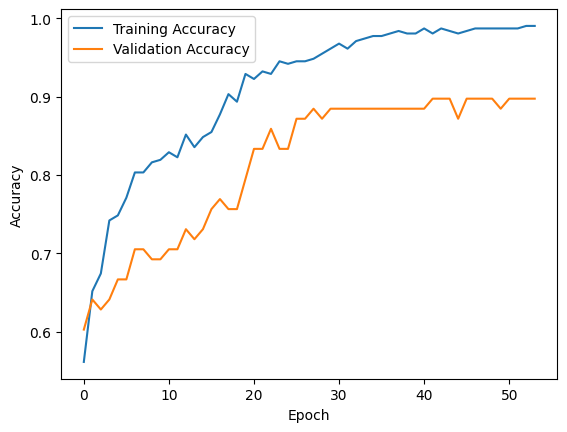

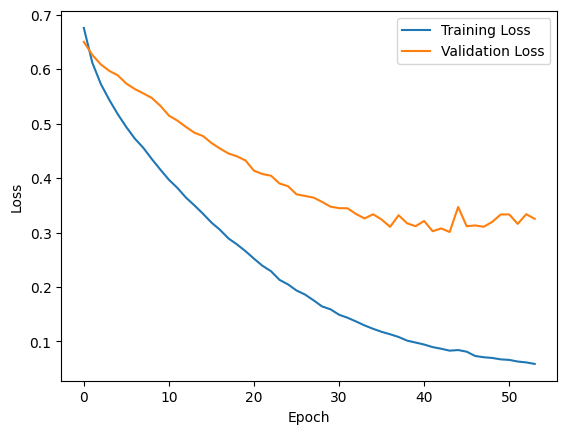

In [47]:
import matplotlib.pyplot as plt

# Accuracy vs Epoch
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss vs Epoch
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [48]:
#save model as h5
model.save('questionnair_v1.h5')

In [49]:
# Define the model architecture
model2 = Sequential()
model2.add(Dense(512, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=keras.regularizers.l2(0.03)))
model2.add(Dropout(0.2))
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(16, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='sigmoid'))

In [50]:
plot_model(model2, to_file='model.png', show_shapes=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [54]:
pip install --upgrade keras

     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     -------- ------------------------------- 10.2/46.2 kB ? eta -:--:--
     ------------------------- ------------ 30.7/46.2 kB 330.3 kB/s eta 0:00:01
     ------------------------- ------------ 30.7/46.2 kB 330.3 kB/s eta 0:00:01
     ------------------------- ------------ 30.7/46.2 kB 330.3 kB/s eta 0:00:01
     --------------------------------- ---- 41.0/46.2 kB 151.3 kB/s eta 0:00:01
     -------------------------------------- 46.2/46.2 kB 164.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.1 MB 825.8 kB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.1 MB 770.8 kB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.1 MB 770.8 kB/s eta 0:00:02
   -- -----

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.10.0 requires keras<2.11,>=2.10.0, but you have keras 3.3.3 which is incompatible.


In [56]:
model2.compile(optimizer=keras.optimizers.Adam(
  learning_rate=0.0009,
  beta_1=0.9,
  beta_2=0.999,
  epsilon=1e-07,
  amsgrad=False,
  decay=1e-6,
), loss='binary_crossentropy', metrics=['accuracy'])


In [57]:
early_stop = EarlyStopping(patience=20, verbose=1)
history = model2.fit(train_dataset,
                    validation_data=val_dataset, epochs=250,
                    batch_size=10)

Epoch 1/250
31/31 [==============================] - 1s 15ms/step - loss: 1.9880 - accuracy: 0.4677 - val_loss: 1.5750 - val_accuracy: 0.4744
Epoch 2/250
31/31 [==============================] - 0s 11ms/step - loss: 1.3120 - accuracy: 0.5677 - val_loss: 1.0901 - val_accuracy: 0.5897
Epoch 3/250
31/31 [==============================] - 0s 11ms/step - loss: 0.9335 - accuracy: 0.6581 - val_loss: 0.8334 - val_accuracy: 0.5769
Epoch 4/250
31/31 [==============================] - 0s 7ms/step - loss: 0.7136 - accuracy: 0.7258 - val_loss: 0.7220 - val_accuracy: 0.6923
Epoch 5/250
31/31 [==============================] - 0s 8ms/step - loss: 0.6027 - accuracy: 0.7548 - val_loss: 0.6480 - val_accuracy: 0.7436
Epoch 6/250
31/31 [==============================] - 0s 8ms/step - loss: 0.5282 - accuracy: 0.7903 - val_loss: 0.8086 - val_accuracy: 0.6410
Epoch 7/250
31/31 [==============================] - 0s 8ms/step - loss: 0.5469 - accuracy: 0.7839 - val_loss: 0.6520 - val_accuracy: 0.6667
Epoch 8/25

In [58]:
#Evaluate model on validation set
val_loss, val_acc = model2.evaluate(X_val, y_val)

print('Val Loss:', val_loss)
print('Val Accuracy:', val_acc)


3/3 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.9231
Val Loss: 0.6931178569793701
Val Accuracy: 0.9230769276618958


In [59]:
nn_accuracy_test = max(history.history['val_accuracy'])
print("Test Accuracy is:",nn_accuracy_test)


Test Accuracy is: 0.9487179517745972


In [60]:
# Evaluate model on test set
test_loss, test_acc = model2.evaluate(X_test, y_test)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

4/4 [==============================] - 0s 5ms/step - loss: 0.5182 - accuracy: 0.9184
Test Loss: 0.5181508660316467
Test Accuracy: 0.918367326259613


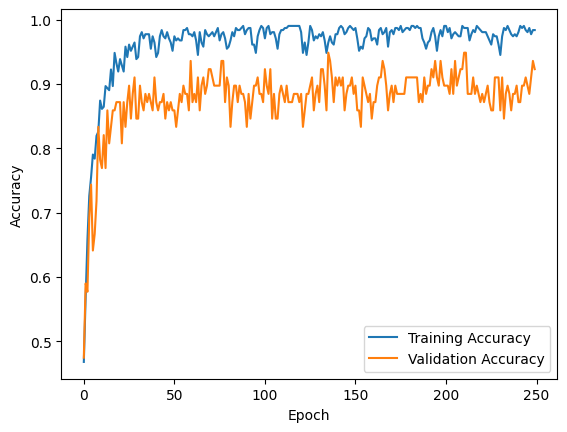

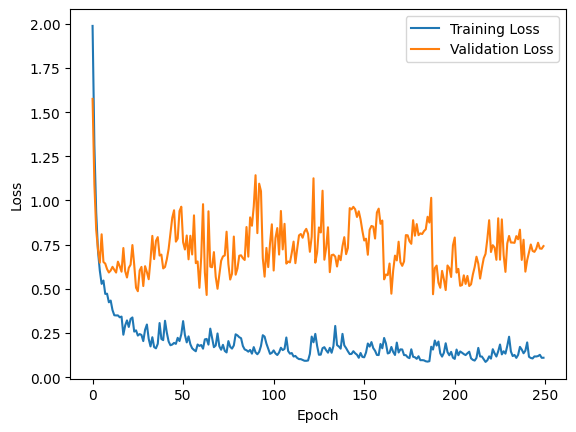

In [61]:
# Accuracy vs Epoch
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss vs Epoch
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [62]:
import numpy as np

y_pred = model2.predict(X_test)

y_pred = np.round(y_pred)

Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x0000017ACB13FD00>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x0000017ACB13FD00>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Orig

In [63]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.82      0.90        44
           1       0.87      1.00      0.93        54

    accuracy                           0.92        98
   macro avg       0.94      0.91      0.92        98
weighted avg       0.93      0.92      0.92        98



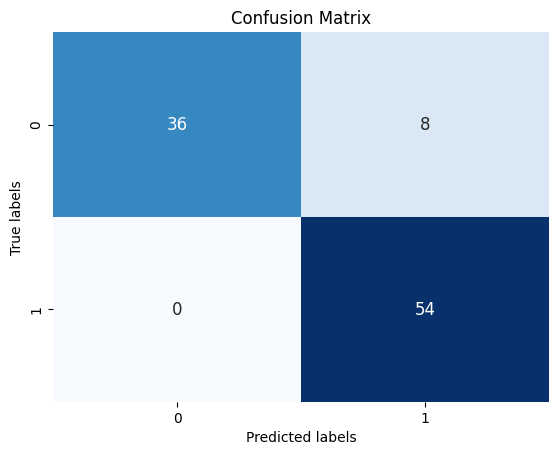

In [64]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False, annot_kws={"fontsize":12})

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.show()

In [65]:
#save model as h5
model2.save('questionnair_v2.h5')